In [1]:
import cv2
import numpy as np
import time
import cvlib as cv
from cvlib.object_detection import draw_bbox
import matplotlib.pyplot as plt
import threading
import queue

In [2]:
capture = cv2.VideoCapture(0)

In [3]:
def live_cam(capture):
    
    while(True):
        ret,frame = capture.read()
        frame = cv2.flip(frame,1)
        cv2.imshow("video",frame)
        c = cv2.waitKey(50)
        if(c==27):
            cv2.destroyAllWindows()
            capture.release() 
            return frame
            
        
        


In [4]:
def get_identify_photo(capture,frame):
    
    _, camphoto = cv2.imencode('.jpg', frame)
    camphoto = cv2.imdecode(camphoto, cv2.IMREAD_UNCHANGED)
    plt.imshow(camphoto[:,:,::-1])
    
    bbox ,labels ,conf = cv.detect_common_objects(camphoto)
    im2 = draw_bbox(camphoto,bbox,labels,conf)
    plt.imshow(im2[:,:,::-1])


In [5]:
def run_function():
    
    capture = cv2.VideoCapture(0)
    i = 0
    while True :

        ret,frame = capture.read()
        frame = cv2.flip(frame,1)
        cv2.imshow("video",frame)
        c = cv2.waitKey(50)
        i = i+1
        if(c==27):
            cv2.destroyAllWindows()
            capture.release() 
            break
        
        if(i==60):
            i = 0
            _, camphoto = cv2.imencode('.jpg', frame)
            #print(type(frame))
            #print(frame)
            camphoto = cv2.imdecode(camphoto, cv2.IMREAD_UNCHANGED)
            #plt.imshow(camphoto[:,:,::-1])
            #plt.show()
            bbox ,labels ,conf = cv.detect_common_objects(camphoto)
            im2 = draw_bbox(camphoto,bbox,labels,conf)
            print(labels)
            plt.imshow(im2[:,:,::-1])
            plt.show()

        """
        _, camphoto = cv2.imencode('.jpg', frame)
        camphoto = cv2.imdecode(camphoto, cv2.IMREAD_UNCHANGED)
        plt.imshow(camphoto[:,:,::-1])
        
        bbox ,labels ,conf = cv.detect_common_objects(camphoto)
        im2 = draw_bbox(camphoto,bbox,labels,conf)
        plt.imshow(im2[:,:,::-1])
        """




['cup', 'person']


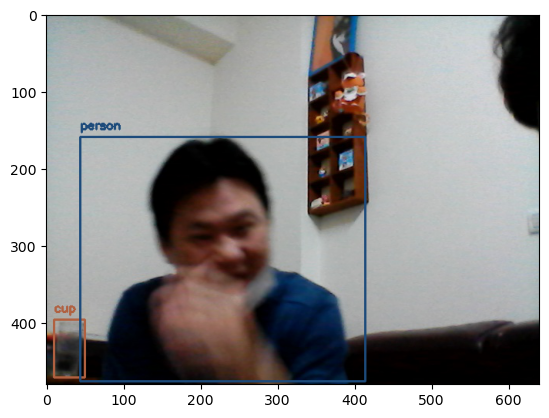

['person']


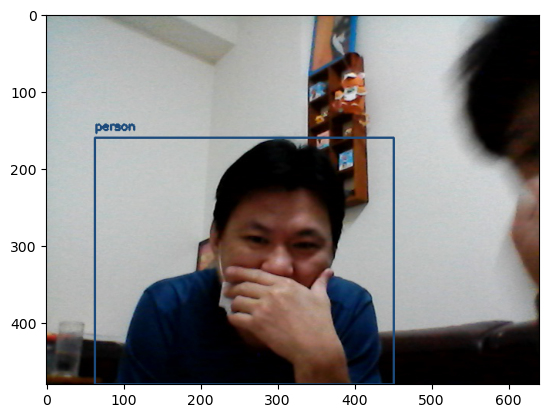

['cup', 'person', 'cup']


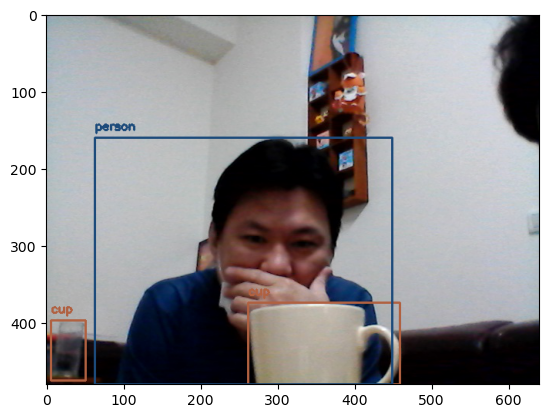

['person', 'cup']


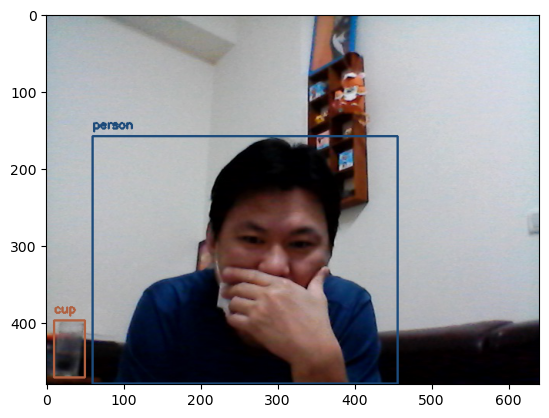

['person', 'cup']


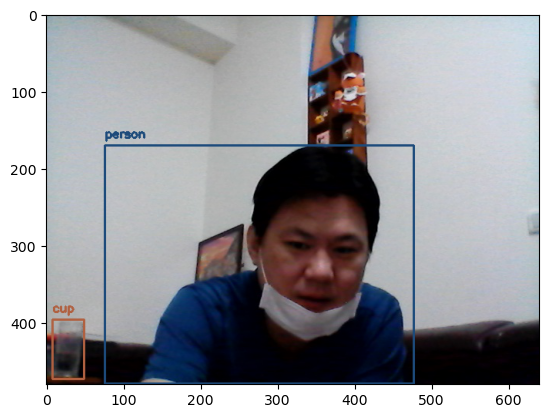

['cup', 'person']


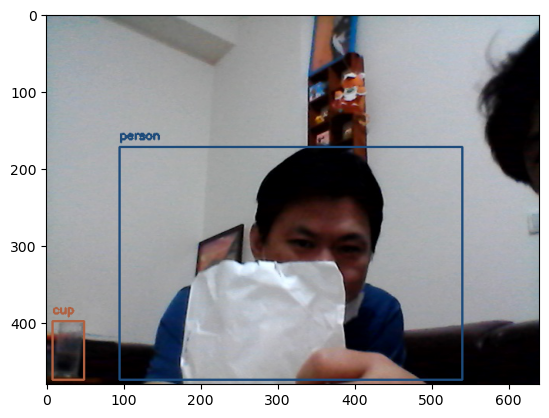

['person', 'cup', 'cell phone']


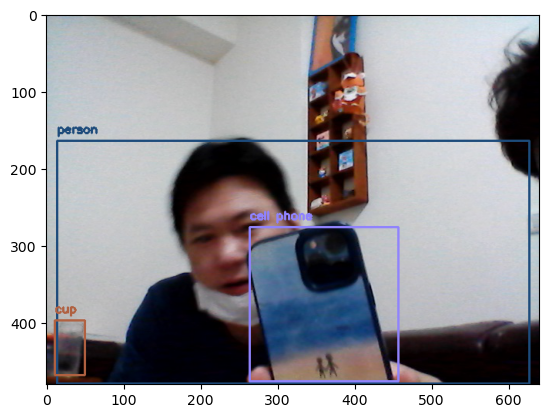

['person', 'cup', 'couch']


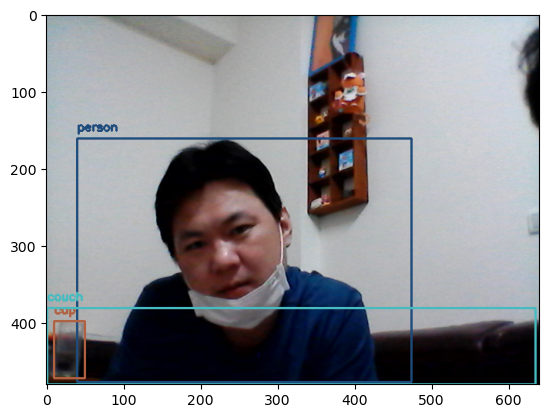

['person', 'cup']


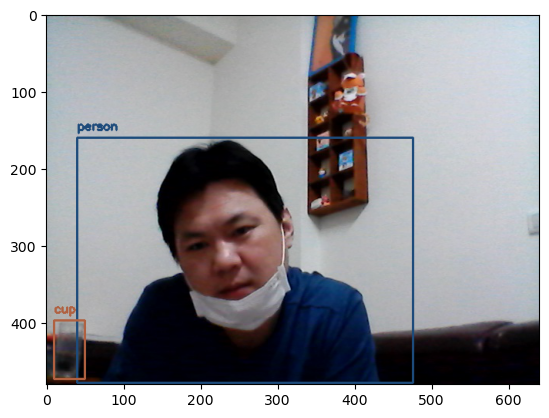

['person', 'cup']


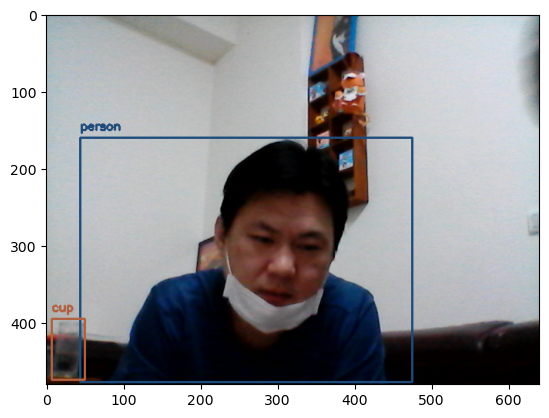

In [6]:
run_function()



In [4]:

def process_frame(frame):
    _, camphoto = cv2.imencode('.jpg', frame)
    camphoto = cv2.imdecode(camphoto, cv2.IMREAD_UNCHANGED)
    bbox ,labels ,conf = cv.detect_common_objects(camphoto)
    im2 = draw_bbox(camphoto,bbox,labels,conf)
    plt.imshow(im2[:,:,::-1])
    plt.show()

def worker():
    capture = cv2.VideoCapture(0)
    while True :
        ret,frame = capture.read()
        frame = cv2.flip(frame,1)
        cv2.imshow("video",frame)
        c = cv2.waitKey(50)
        if(c==27):
            cv2.destroyAllWindows()
            capture.release() 
            break
        if not frame_queue.full():
            frame_queue.put(frame)

def processor():
    i = 0
    while True:
        frame = frame_queue.get()
        if i % 30 == 0:
            process_frame(frame)
        i += 1
        i %= 300
        frame_queue.task_done()

if __name__ == "__main__":
    frame_queue = queue.Queue(maxsize=10)
    


    t1 = threading.Thread(target=worker)
    t2 = threading.Thread(target=processor)
    t1.start()
    t2.start()
    
    t1.join()
    t2.join()

    print("所有執行緒結束")

In [4]:
type(frame)

NameError: name 'frame' is not defined

In [4]:


# 定義一個共享變數
shared_variable = []

# 定義一個函數，用於生成一個值
def producer():
    global shared_variable
    capture = cv2.VideoCapture(0)
    
    

    ret,frame = capture.read()
    frame = cv2.flip(frame,1)
    cv2.imshow("video",frame)
    shared_variable = frame
    c = cv2.waitKey(50)
    
    if(c==27):
        cv2.destroyAllWindows()
        capture.release()
        stop_event.set()
        

    
        

# 定義一個函數，用於使用生成的值
def consumer():
    
    global shared_variable
    while True:
        capture = cv2.VideoCapture(0)
        # 讀取共享變數的值
        frame = shared_variable
        # 使用讀取到的值

        _, camphoto = cv2.imencode('.jpg', frame)
        camphoto = cv2.imdecode(camphoto, cv2.IMREAD_UNCHANGED)

        bbox ,labels ,conf = cv.detect_common_objects(camphoto)
        im2 = draw_bbox(camphoto,bbox,labels,conf)
        plt.imshow(im2[:,:,::-1])
        plt.show()
        
        # 等待一段時間，模擬使用值的過程
        time.sleep(10)

# 創建兩個執行緒，並開始執行生成和使用值的函數
producer_thread = threading.Thread(target=producer)
consumer_thread = threading.Thread(target=consumer)
producer_thread.start()
consumer_thread.start()
producer_thread.join()
consumer_thread.join()

Exception in thread Thread-6:
Traceback (most recent call last):
  File "c:\Users\w\anaconda3\envs\yolo\lib\threading.py", line 980, in _bootstrap_inner
    self.run()
  File "c:\Users\w\anaconda3\envs\yolo\lib\threading.py", line 917, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\w\AppData\Local\Temp\ipykernel_11392\1778638763.py", line 36, in consumer
cv2.error: OpenCV(4.6.0) :-1: error: (-5:Bad argument) in function 'imencode'
> Overload resolution failed:
>  - img is not a numpy array, neither a scalar
>  - Expected Ptr<cv::UMat> for argument 'img'

